In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [4]:
filename = 'Ez.csv'
Ez = pd.read_csv(filename)
zpos = np.array([float(i) for i in np.array(Ez['% Model'])[8:]]) # in mm
Efield_z =np.array([float(i) for i in np.array(Ez['Elec_field_sim3D_final_2.mph'])[8:]]) # in V/m

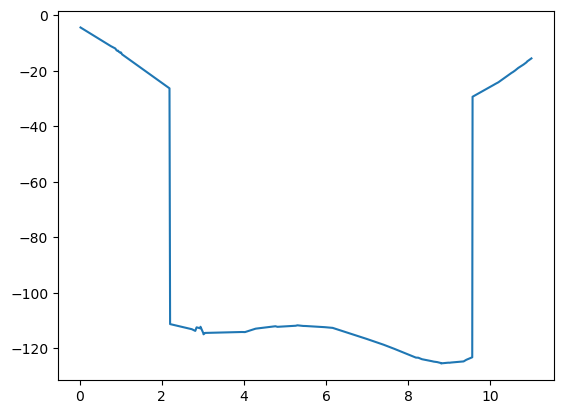

In [19]:
# lens is at sudden cut off on right hand side so particle is position approx 1.6mm left of that.
plt.plot(zpos, Efield_z)

In [27]:
E_fieldgrad_zz = np.diff(Efield_z)/np.diff(zpos)*1000

In [38]:
# Lens is at the index below
lensind = np.argmax(E_fieldgrad_zz)
print(lensind)
print(zpos[lensind])
print(zpos[lensind] - 1.6)
print(zpos[109])
print(zpos[108])
# so averaging index 108 and 109 gives the best estimate of electric field strength and gradient

152
9.5588329058589
7.9588329058589
7.979671313045564
7.924366339252781


In [42]:
print((Efield_z[108] + Efield_z[109])/2)

-121.89496296793288


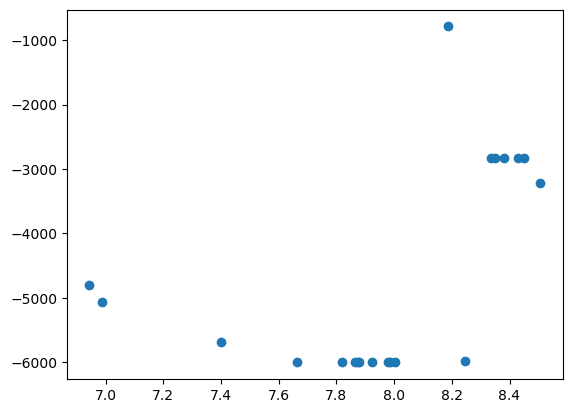

In [44]:
plt.plot(zpos[100:120], E_fieldgrad_zz[100:120], 'o')

In [46]:
print((E_fieldgrad_zz[108] + E_fieldgrad_zz[109])/2)

-6003.4137723663425


In [51]:
def Line(x, a, b):
    return a*x + b

In [60]:
fit, cov = opt.curve_fit(Line, zpos[108:113], Efield_z[108:113])
print(fit)
fitted = Line(zpos, *fit)

[ -6.00341377 -74.15570363]


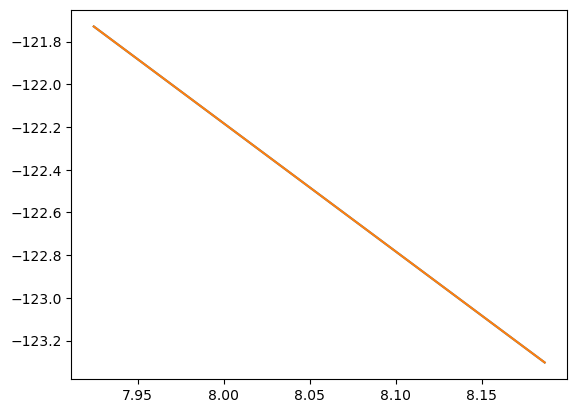

In [61]:
plt.plot(zpos[108:113], Efield_z[108:113])
plt.plot(zpos[108:113], fitted[108:113])